In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

img_height = 168
img_width = 65
num_classes = 2

train_generator = train_datagen.flow_from_directory('ds/dfu_thermo_ds/train/',
                                                 target_size=(img_height, img_width),
                                                 batch_size=32,
                                                 class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('ds/dfu_thermo_ds/test/',
                                                   target_size=(img_height, img_width),
                                                   batch_size=32,
                                                   class_mode='categorical')

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_generator,
          epochs=10,
          validation_data=validation_generator)

model.save('dfu.h5')


Found 140 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


/home/someone/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-08-30 10:39:02.176726: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-30 10:39:02.178027: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipp

Epoch 1/10


/home/someone/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 374ms/step - accuracy: 0.8334 - loss: 0.2920 - val_accuracy: 0.8667 - val_loss: 49.9312
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 68.8181
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 81.0031
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 89.4241
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 93.7772
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 98.5007
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 102.2217
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_acc

In [86]:
import imageio as img
import numpy as np

test_cg_image = img.imread("ds/dfu_thermo_ds/cg/test/cg/CG028_M_L.png")

test_cg_image.resize((img_height, img_width, 3))
test_cg_image = test_cg_image.astype('float32') / 255.0
test_cg_image = np.expand_dims(test_cg_image, axis=0)
c = model.predict(test_cg_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/tmp/ipykernel_1238475/3538575907.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  test_cg_image = img.imread("ds/dfu_thermo_ds/cg/test/cg/CG028_M_L.png")


In [125]:
import matplotlib.pyplot as plt

class_map = [None, None]
class_map[train_generator.class_indices["cg"]] = "Healthy"
class_map[train_generator.class_indices["dm"]] = "Diabetic"

def predict_img(image):
    image.resize((img_height, img_width, 3), refcheck=False)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    conf = model.predict(image)
    conf = conf[0]
    c = np.argmax(conf)
    return (c, conf[c])

def print_result(path):
    x = img.imread(path)
    c, conf = predict_img(x)
    image = img.imread(path)
    plt.imshow(image)
    plt.title("Patient Is %s:%f"%(class_map[c], conf))
    plt.show()
    
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/tmp/ipykernel_1238475/1592269810.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  x = img.imread(path)
/tmp/ipykernel_1238475/1592269810.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread(path)


1 0.9946038


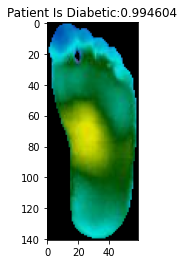

True: Healty Patient
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0 0.7756586


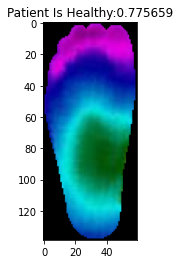

True: Healty Patient
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1 0.9362759


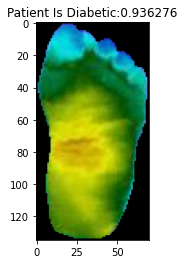

True: Diabetic Patient
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1 0.86118865


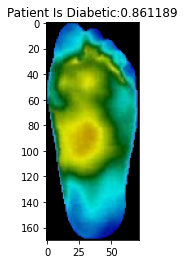

True: Healty Patient
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1 0.99983656


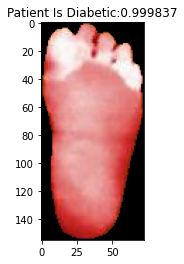

True: Diabetic Patient
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1 0.9965532


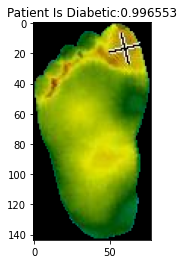

True: Diabetic Patient
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1 0.9824118


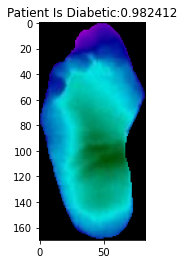

True: Diabetic Patient
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
0 0.910797


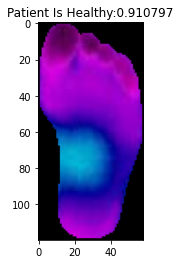

True: Healty Patient
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1 0.9999999


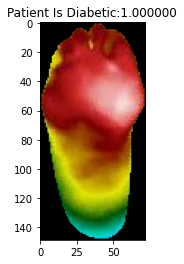

True: Diabetic Patient
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1 0.9998555


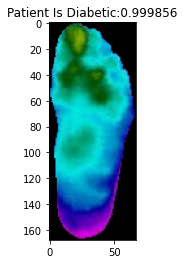

True: Diabetic Patient
---


In [143]:
import os
import random





def print_true_label(x):
    if "CG" in x.split("\\")[-1] :
        print("True: Healty Patient")
    else:
        print("True: Diabetic Patient")        
        
        
paths = ["ds/dfu_thermo_ds/cg/test/cg/%s"%x for x in os.listdir("ds/dfu_thermo_ds/cg/test/cg/")] + ["ds/dfu_thermo_ds/cg/test/dm/%s"%x for x in os.listdir("ds/dfu_thermo_ds/cg/test/dm/")]


for x in random.sample(paths, 10):
    print_result(x)
    print_true_label(x)
    print("---")
    